<a href="https://colab.research.google.com/github/ChiUzonwa/Acitivy-1/blob/main/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
!pip install prophet

In [52]:
path= '/content/drive/MyDrive/Colab Notebooks/Time_series_analysis_and_forecast_DATASET(1).csv'
data=pd.read_csv(path)
data.head(5)

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [7]:
data.isnull()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
92011,False,False,False,False,False
92012,False,False,False,False,False
92013,False,False,False,False,False
92014,False,False,False,False,False


In [8]:
#converting the FullDate column to a datetime column
data['FullDate']= pd.to_datetime(data['FullDate'])
data.set_index('FullDate', inplace= True)

data

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...
2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060


In [9]:
#resampling the data to daily frequency
daily_sampling= data.resample('D').sum()

In [10]:
daily_sampling.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


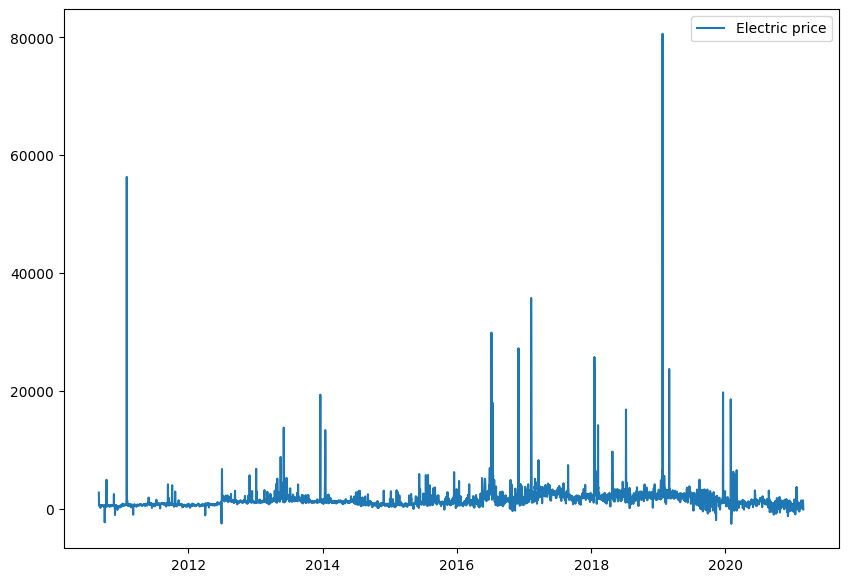

In [11]:
#plot the electric price over time
plt.figure(figsize=(10,7))
plt.plot(daily_sampling.index, daily_sampling['ElecPrice'], label='Electric price')
plt.xlabel=('Date')
plt.ylabel=('Electricity prices')
plt.title=('Electricity prices Time Series')
plt.legend()
plt.show()

In [12]:
#decomposing the time series into trends, seasonality and residuals
decomposition= seasonal_decompose(daily_sampling['ElecPrice'], model='additive')
Trend= decomposition.trend
Seasonal= decomposition.seasonal
Residual= decomposition.resid

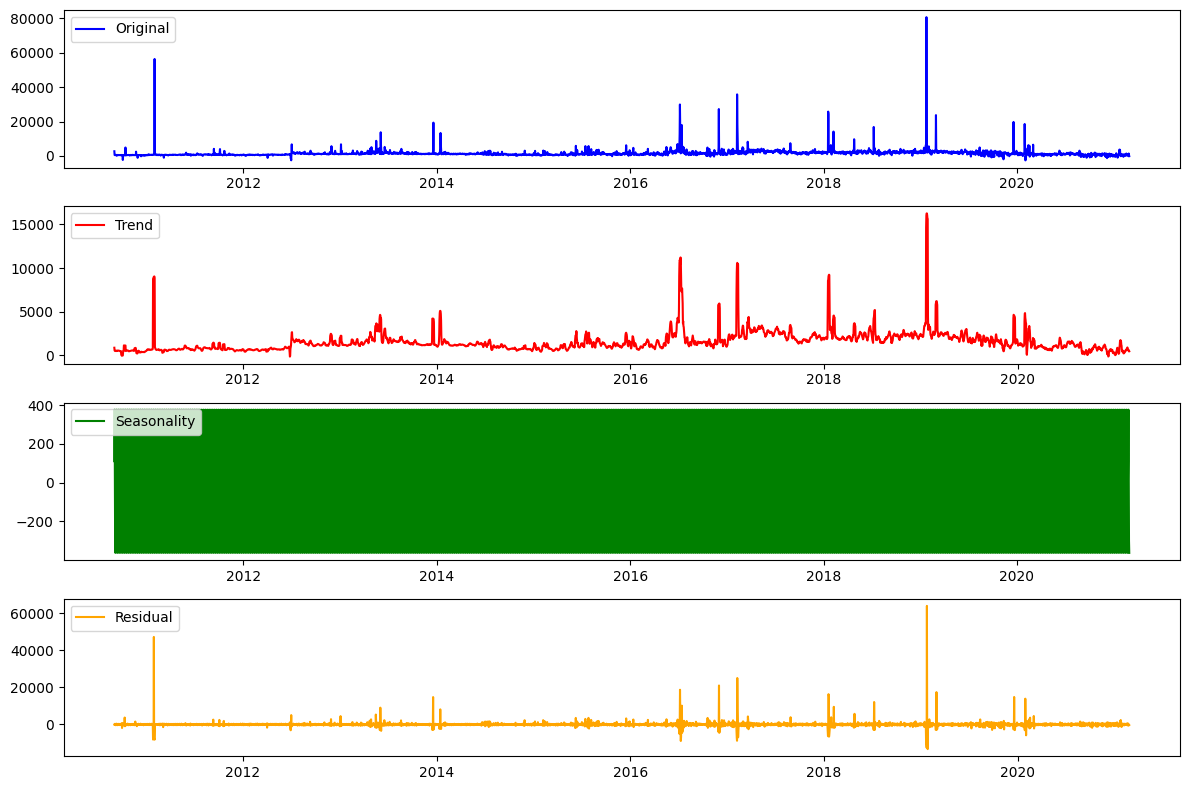

In [13]:
plt.figure(figsize=(12,8))
plt.subplot(4,1,1)
plt.plot(daily_sampling.index, daily_sampling['ElecPrice'], label='Original', color='b')
plt.legend(loc= 'upper left')
plt.title=('Original Time series')
plt.subplot(4,1,2)
plt.plot(daily_sampling.index, Trend, label='Trend', color='r')
plt.legend(loc= 'upper left')
plt.title=('Trend Component')
plt.subplot(4,1,3)
plt.plot(daily_sampling.index, Seasonal, label='Seasonality', color='g')
plt.legend(loc= 'upper left')
plt.title=('Seasonal Component')
plt.subplot(4,1,4)
plt.plot(daily_sampling.index, Residual, label='Residual', color='orange')
plt.legend(loc= 'upper left')
plt.title=('Residual Component')
plt.tight_layout()
plt.show()

In [14]:
#splitting data into x and y
x= daily_sampling
y= daily_sampling['ElecPrice']

In [15]:
print(x)
print(y)

             Tmax      SysLoad  GasPrice  ElecPrice
FullDate                                           
2010-09-01  379.2  41565.38000   88.5600   2751.700
2010-09-02  369.6  38898.99000   88.5600    570.810
2010-09-03  439.2  41665.76000  106.8000    504.975
2010-09-04  328.8  35638.08500   81.3600    502.275
2010-09-05  357.6  35611.41000  106.8000    500.555
...           ...          ...       ...        ...
2021-02-24  537.6  -1525.49745  134.4000    634.770
2021-02-25  518.4   4539.07855  130.5048    577.515
2021-02-26  547.2   9517.02430  130.1808   1445.495
2021-02-27  564.0   4932.88015  130.0800    488.980
2021-02-28  583.2   6675.05485  131.6352    -98.985

[3834 rows x 4 columns]
FullDate
2010-09-01    2751.700
2010-09-02     570.810
2010-09-03     504.975
2010-09-04     502.275
2010-09-05     500.555
                ...   
2021-02-24     634.770
2021-02-25     577.515
2021-02-26    1445.495
2021-02-27     488.980
2021-02-28     -98.985
Freq: D, Name: ElecPrice, Length: 383

In [16]:
#splitting data into train and test sets
train_size=int(len(daily_sampling <= 2757))
test_size=int(len(daily_sampling >2757))

In [17]:
from prophet import Prophet

In [61]:
#preparing data for Prophet model
prophet_data=pd.DataFrame({'ds': daily_sampling.index, 'y': daily_sampling['ElecPrice']})

In [19]:
prophet_data

,ds,y
FullDate,,
2010-09-01,2010-09-01,2751.700
2010-09-02,2010-09-02,570.810
2010-09-03,2010-09-03,504.975
2010-09-04,2010-09-04,502.275
2010-09-05,2010-09-05,500.555
...,...,...
2021-02-24,2021-02-24,634.770
2021-02-25,2021-02-25,577.515
2021-02-26,2021-02-26,1445.495


In [20]:
#building and fitting the model
prophet_model= Prophet()
prophet_model.fit(prophet_data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqhs_k0j2/cwl6x030.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqhs_k0j2/ip1yyaq2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1368', 'data', 'file=/tmp/tmpqhs_k0j2/cwl6x030.json', 'init=/tmp/tmpqhs_k0j2/ip1yyaq2.json', 'output', 'file=/tmp/tmpqhs_k0j2/prophet_modell2o7_sxs/prophet_model-20230801144740.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:47:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:47:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [21]:
#create dataframe for future predictions
future=prophet_model.make_future_dataframe(periods=test_size)

In [22]:
future

,ds
0,2010-09-01
1,2010-09-02
2,2010-09-03
3,2010-09-04
4,2010-09-05
...,...
7663,2031-08-25
7664,2031-08-26
7665,2031-08-27
7666,2031-08-28


In [65]:
prophet_forecast=prophet_model.predict(future)
prophet_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,804.149598,-1836.097962,3745.672806,804.149598,804.149598,84.225348,84.225348,84.225348,113.851107,113.851107,113.851107,-29.625759,-29.625759,-29.625759,0.0,0.0,0.0,888.374946
1,2010-09-02,804.151095,-1543.160232,3978.964962,804.151095,804.151095,326.292404,326.292404,326.292404,375.241493,375.241493,375.241493,-48.949088,-48.949088,-48.949088,0.0,0.0,0.0,1130.443499
2,2010-09-03,804.152591,-1968.403556,3817.744292,804.152591,804.152591,-7.705215,-7.705215,-7.705215,62.824340,62.824340,62.824340,-70.529555,-70.529555,-70.529555,0.0,0.0,0.0,796.447376
3,2010-09-04,804.154088,-2124.981123,3076.104263,804.154088,804.154088,-392.782768,-392.782768,-392.782768,-298.874299,-298.874299,-298.874299,-93.908469,-93.908469,-93.908469,0.0,0.0,0.0,411.371320
4,2010-09-05,804.155584,-2468.830890,3050.228129,804.155584,804.155584,-481.599330,-481.599330,-481.599330,-362.997901,-362.997901,-362.997901,-118.601429,-118.601429,-118.601429,0.0,0.0,0.0,322.556254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,2031-08-25,-11693.959895,-25040.761929,1893.975005,-24904.068357,799.765131,124.405436,124.405436,124.405436,111.661813,111.661813,111.661813,12.743623,12.743623,12.743623,0.0,0.0,0.0,-11569.554458
7664,2031-08-26,-11697.090954,-25298.763928,1179.368770,-24913.668259,801.017100,16.807639,16.807639,16.807639,-1.706553,-1.706553,-1.706553,18.514193,18.514193,18.514193,0.0,0.0,0.0,-11680.283314
7665,2031-08-27,-11700.222013,-24978.731058,1241.917859,-24923.268161,802.269069,134.312955,134.312955,134.312955,113.851107,113.851107,113.851107,20.461848,20.461848,20.461848,0.0,0.0,0.0,-11565.909058
7666,2031-08-28,-11703.353072,-24648.846835,1558.925570,-24932.868063,803.521039,393.796957,393.796957,393.796957,375.241493,375.241493,375.241493,18.555464,18.555464,18.555464,0.0,0.0,0.0,-11309.556116


In [31]:
prophet_forecast= prophet_forecast['yhat'].tail(test_size)
prophet_forecast

3834      312.692572
3835      198.480339
3836      312.953903
3837      572.599691
3838      257.410635
            ...     
7663   -11569.554458
7664   -11680.283314
7665   -11565.909058
7666   -11309.556116
7667   -11630.806305
Name: yhat, Length: 3834, dtype: float64

In [41]:
#evaluating the model by calculating the mean squared error(MSE)
prophet_mse= mean_squared_error (daily_sampling['ElecPrice'],prophet_forecast)
print(f'The Mean Squared Error is :{prophet_mse}')

The Mean Squared Error is :72583782.281213


In [42]:
p_rmse=np.sqrt(prophet_mse)
p_rmse

8519.6116273697

In [54]:
path= '/content/drive/MyDrive/Colab Notebooks/Time_series_analysis_and_forecast_DATASET(1).csv'
data=pd.read_csv(path)
data.head(5)

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [55]:
#converting the FullDate column to a datetime column
data['FullDate']= pd.to_datetime(data['FullDate'])
data.set_index('FullDate', inplace= True)

In [56]:
#resampling the data to daily frequency
daily_sampling= data.resample('D').sum()

In [57]:
#splitting data into x and y
x= daily_sampling
y= daily_sampling['ElecPrice']

In [59]:
model_new= Prophet() #initiate prophet
model_new.add_regressor('SysLoad')
model_new.add_regressor('Tmax')
model_new.add_regressor('GasPrice')

In [60]:
#splitting data into train and test sets
train_size=int(len(daily_sampling <= 2757))
test_size=int(len(daily_sampling >2757))

In [62]:
#preparing data for Prophet model
prophet_data=pd.DataFrame({'ds': daily_sampling.index, 'y': daily_sampling['ElecPrice']})

In [63]:
#building and fitting the model
prophet_model= Prophet()
prophet_model.fit(prophet_data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqhs_k0j2/l3qbgo1q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqhs_k0j2/mr5pa5bm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85403', 'data', 'file=/tmp/tmpqhs_k0j2/l3qbgo1q.json', 'init=/tmp/tmpqhs_k0j2/mr5pa5bm.json', 'output', 'file=/tmp/tmpqhs_k0j2/prophet_modelwrz0t_hz/prophet_model-20230801162951.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:29:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:29:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [64]:
#create dataframe for future predictions
future=prophet_model.make_future_dataframe(periods=test_size)

In [66]:
future.head(5)

,ds
0,2010-09-01
1,2010-09-02
2,2010-09-03
3,2010-09-04
4,2010-09-05


In [ ]:
prophet_data=prophet_data.append()